In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Upload Rainfall Data

In [2]:
import pandas as pd
df_rain = pd.read_csv("Hoppers Crossing-Hourly-Rainfall.csv")
print(df_rain.head())

             Date/Time  Current rainfall (mm)  Cumulative rainfall (mm)
0  2018-12-02 18:00:00                    0.0                       0.0
1  2018-12-02 17:00:00                    0.0                       0.0
2  2018-12-02 16:00:00                    0.0                       0.0
3  2018-12-02 15:00:00                    0.0                       0.0
4  2018-12-02 14:00:00                    0.0                       0.0


In [3]:
df_rain.shape

(78848, 3)

In [4]:
df_rain.describe()

,Current rainfall (mm),Cumulative rainfall (mm)
count,78844.000000,78847.000000
mean,0.049206,0.586580
std,0.765296,2.770216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


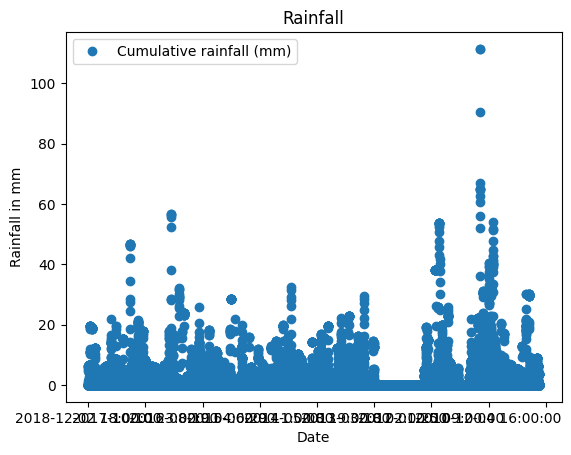

In [5]:
import matplotlib.pyplot as plt
df_rain.plot(x='Date/Time', y='Cumulative rainfall (mm)', style='o')

plt.title('Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall in mm')
plt.show()

Upload River Data

In [6]:
import pandas as pd
df_river = pd.read_csv("Hoppers Crossing-Hourly-River-Level.csv")
df_river.head()

,Date/Time,Level (m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63


In [7]:
df_river.shape

(78822, 2)

In [8]:
df_river.describe()

,Level (m)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


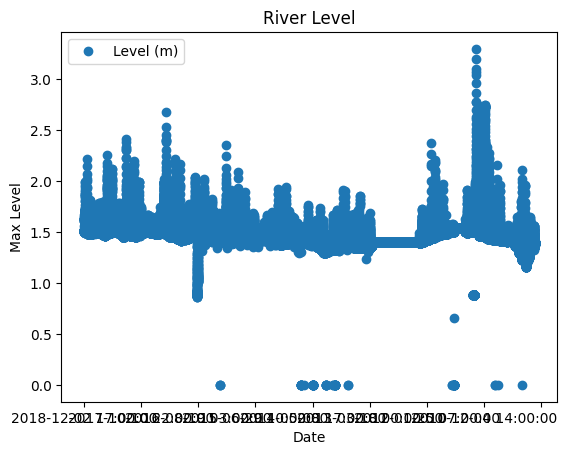

In [9]:
import matplotlib.pyplot as plt
df_river.plot(x='Date/Time', y='Level (m)', style='o')
plt.title('River Level')
plt.xlabel('Date')
plt.ylabel('Max Level')
plt.show()

In [10]:
#df_river["Date/Time"] = df_river["Date/Time"].str.replace("00:00", "")
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2009-12-01 00:00:00,0.0,0.2,NaN
1,2009-12-01 01:00:00,0.0,0.2,NaN
2,2009-12-01 02:00:00,0.0,0.2,NaN
3,2009-12-01 03:00:00,0.0,0.2,NaN
4,2009-12-01 04:00:00,0.0,0.2,NaN


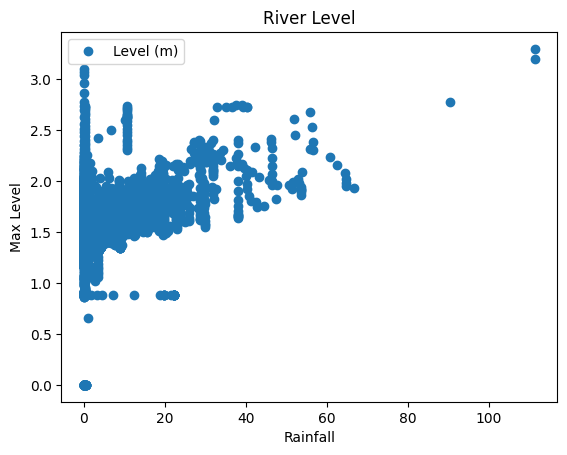

In [11]:
import matplotlib.pyplot as plt
df.plot(x='Cumulative rainfall (mm)', y='Level (m)', style='o')
plt.title('River Level')
plt.xlabel('Rainfall')
plt.ylabel('Max Level')
plt.show()

In [12]:
df['Cumulative rainfall (mm)'] = df['Cumulative rainfall (mm)'].fillna(0)
df['Level (m)'] = df['Level (m)'].fillna(0)

df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2009-12-01 00:00:00,0.0,0.2,0.0
1,2009-12-01 01:00:00,0.0,0.2,0.0
2,2009-12-01 02:00:00,0.0,0.2,0.0
3,2009-12-01 03:00:00,0.0,0.2,0.0
4,2009-12-01 04:00:00,0.0,0.2,0.0


In [13]:
#df = df[(df != 0).all(1)]

In [14]:
df = df.drop(columns=['Current rainfall (mm)', 'Date/Time'])
df.shape

(78850, 2)

In [15]:
X = df.iloc[:, :1].values
y = df.iloc[:, 1:2].values

In [16]:
#print(X)
#print(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print(regressor.intercept_)

[1.44325876]


In [20]:
print(regressor.coef_)

[[0.01686844]]


In [21]:
y_pred = regressor.predict(X_test)

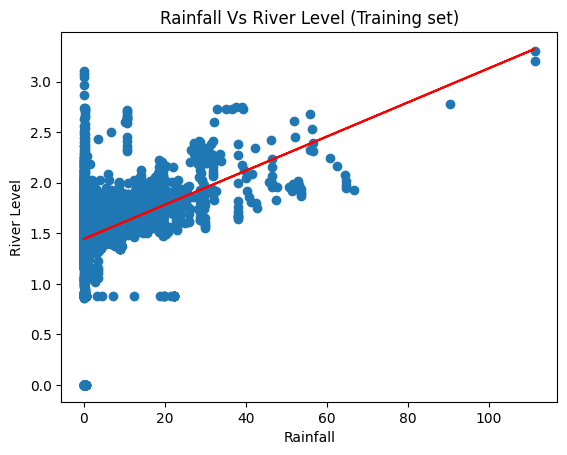

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

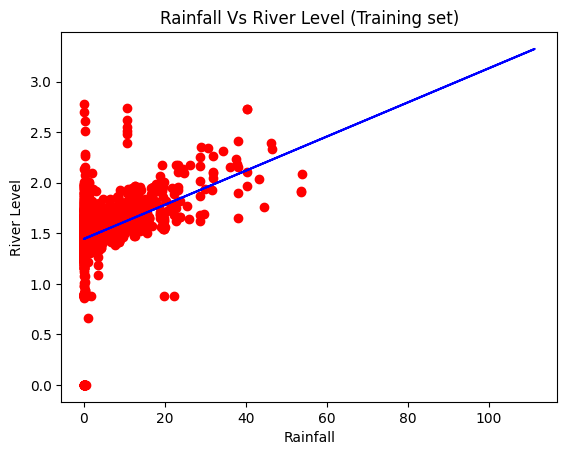

In [23]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

Enter Rainfall amount in mm

In [24]:
#@title Enter Rainfall amount in mm
Rainfall_Amount = 10 #@param {type:"number"}

Flood Possibility

In [25]:
#@title Flood possibility
predicted_riverlevel = regressor.predict([[Rainfall_Amount]]) # Rainfall_Amount needs to be a 2D array
print(predicted_riverlevel)
if (predicted_riverlevel > 1.5):
  print("FLOOD")
else:
  print("No FLOOD")

[[1.61194316]]
FLOOD
